In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
zip_path = '/content/drive/MyDrive/datasets/dataset.zip'
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/brain-tumor-dataset')

In [4]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
testing_set = test_datagen.flow_from_directory(
    '/content/brain-tumor-dataset/dataset/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True)

Found 394 images belonging to 4 classes.


In [5]:
X_train = []
Y_train = []
image_size = 224
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/brain-tumor-dataset/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/brain-tumor-dataset/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 224, 224, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
resnet50 = Sequential()
resnet50.add(base_model)
resnet50.add(GlobalAveragePooling2D())
resnet50.add(Dense(units=256, activation='relu'))
resnet50.add(Dense(units=4, activation='softmax'))

94765736/94765736 [==============================] - 2s 0us/step


In [10]:
resnet50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 24113284 (91.98 MB)
Trainable params: 525572 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [11]:
resnet50.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = resnet50.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 10s 115ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 0.4231 - val_accuracy: 0.9150
Epoch 2/10
83/83 [==============================] - 9s 112ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.4228 - val_accuracy: 0.9218
Epoch 3/10
83/83 [==============================] - 9s 113ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.4333 - val_accuracy: 0.9218
Epoch 4/10
83/83 [==============================] - 9s 112ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 0.4652 - val_accuracy: 0.9184
Epoch 5/10
83/83 [==============================] - 9s 111ms/step - loss: 0.0263 - accuracy: 0.9879 - val_loss: 0.4595 - val_accuracy: 0.9048
Epoch 6/10
83/83 [==============================] - 9s 105ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.3931 - val_accuracy: 0.9252
Epoch 7/10
83/83 [==============================] - 9s 105ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.5717 - val_accuracy: 0.8946
Epoch

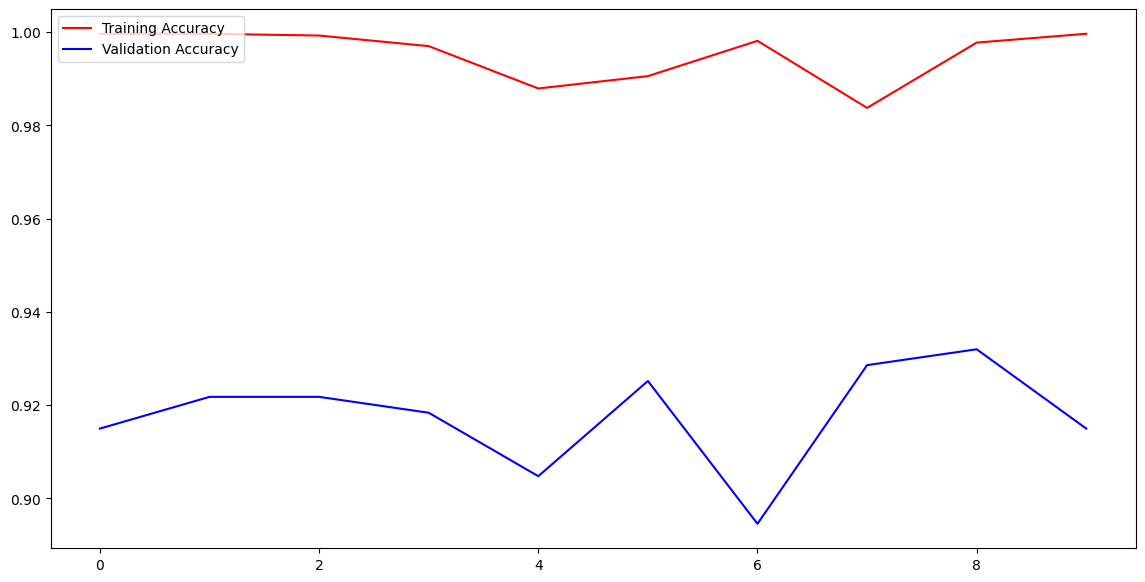

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

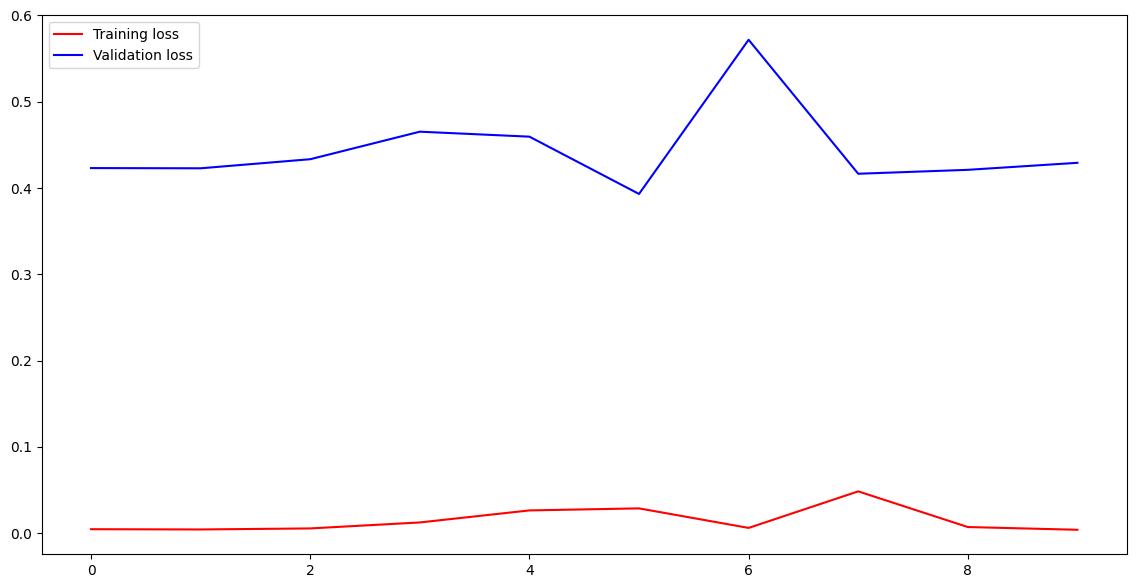

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

92/92 [==============================] - 9s 95ms/step


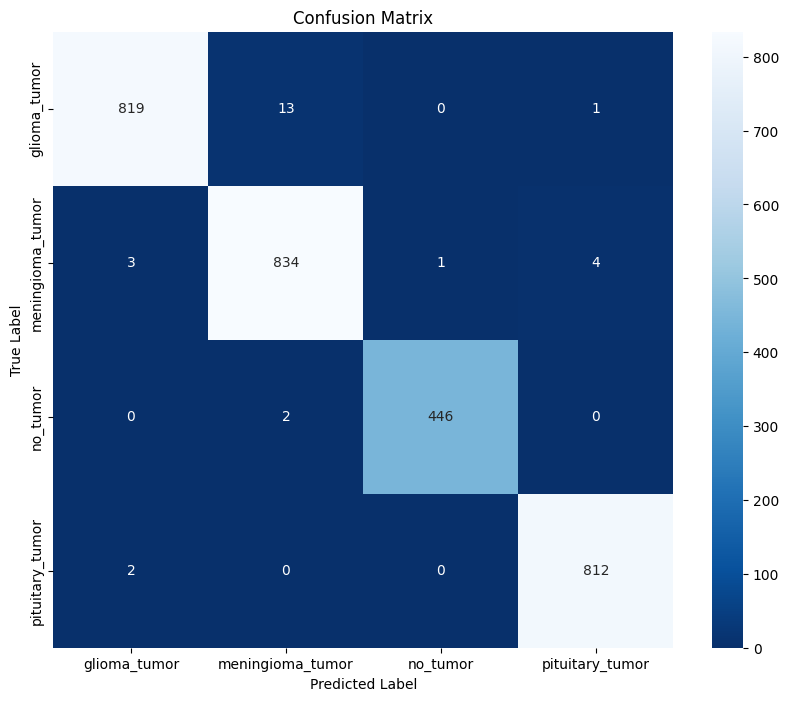

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = np.argmax(y_train, axis=1)
y_pred = np.argmax(resnet50.predict(X_train), axis=1)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

11/11 [==============================] - 1s 97ms/step


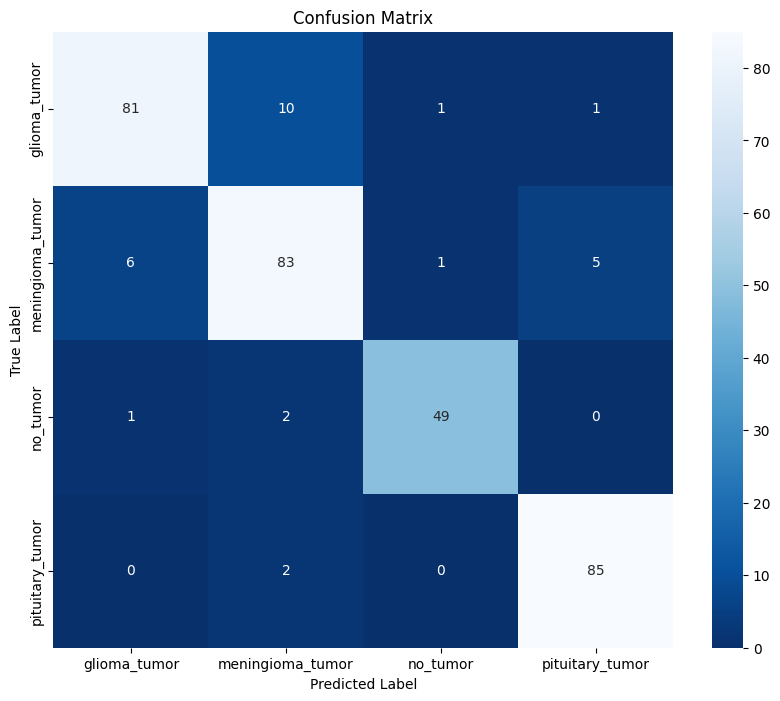

In [26]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(resnet50.predict(X_test), axis=1)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        93
           1       0.86      0.87      0.86        95
           2       0.96      0.94      0.95        52
           3       0.93      0.98      0.96        87

    accuracy                           0.91       327
   macro avg       0.92      0.92      0.92       327
weighted avg       0.91      0.91      0.91       327



In [28]:
img = cv2.imread('/content/brain-tumor-dataset/dataset/Testing/meningioma_tumor/image(120).jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

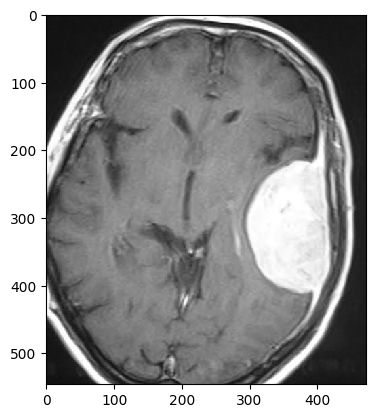

In [29]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain-tumor-dataset/dataset/Testing/meningioma_tumor/image(120).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [31]:
a=resnet50.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 23ms/step


1

In [32]:
resnet50.save('BrainTumorResnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
